In [1]:
'''
 File name: data_exploration_undesa_2020.ipynb
 Author: Lola Bardel
 Date created: 09/03/2024
 Date last modified: 14/03/2024
 Python Version: 3.6
'''

'\n File name: data_exploration_undesa_2020.ipynb\n Author: Lola Bardel\n Date created: 09/03/2024\n Date last modified: 14/03/2024\n Python Version: 3.6\n'

## Choses à faire

* Automatiser l'importation des documents csv/excel et des feuilles contenues + noms des dataframes 
* Ajouter via l'annexe et les location code une colonne "Continent" et une colonne "Sous-region" pour faire du tri facilement

# Data exploration UNDESA 2020

In [2]:
import pandas as pd
import numpy as np
import math
import os

from matplotlib import pyplot as plt
import seaborn as sns

import geopandas as gpd

import utils

In [3]:
# Initialization
PATH_WORLD = "data_world/"

# File paths
AGE_SEX_DESTINATION = PATH_WORLD + "undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx"
SEX_DESTINATION_ORIGIN = PATH_WORLD + "undesa_pd_2020_ims_stock_by_sex_destination_and_origin.xlsx"

In [4]:
# List of useful names
file_names = list([PATH_WORLD + "undesa_pd_2020_ims_stock_by_age_sex_and_destination.xlsx",
                  PATH_WORLD + "undesa_pd_2020_ims_stock_by_sex_destination_and_origin.xlsx"])

# Code repartition 
continent_codes = [903, 935, 908, 904, 905, 909]
continent_names = ["Africa", "Asia", "Europe", "Latin_America", "Northern_America", "Oceania"]

### Location code correspondence table

In [5]:
location_codes = pd.read_excel(PATH_WORLD + "aggregates_correspondence_table_2020_1.xlsx", index_col=1, skiprows=10, na_values='..')

In [6]:
location_codes

,Unnamed: 0,Notes,Location code,ISO3 Alpha-code,Code,Name,Unnamed: 7,Code.1,Code.2,Name.1,...,"Less developed regions, excluding least developed countries\n934","Less developed regions, excluding China\n948",Land-Locked Developing Countries (LLDC)\n1636,Small Island Developing States (SIDS)\n1637,High-income Countries\n1503,Middle-income Countries\n1517,Upper-middle-income Countries\n1502,Lower-middle-income Countries\n1501,Low-income Countries\n1500,No income group available\n1518
"Region, subregion, country or area*",,,,,,,,,,,,,,,,,,,,,
WORLD,NaN,NaN,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Saharan Africa,NaN,NaN,947,NaN,12.0,SDG region,1828.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Northern Africa and Western Asia,NaN,NaN,1833,NaN,12.0,SDG region,1828.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Central and Southern Asia,NaN,NaN,921,NaN,12.0,SDG region,1828.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eastern and South-Eastern Asia,NaN,NaN,1832,NaN,12.0,SDG region,1828.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,NaN,NaN,882,WSM,4.0,Country/Area,957.0,900.0,957.0,Polynesia,...,934.0,948.0,NaN,1637.0,NaN,1517.0,1502.0,NaN,NaN,NaN
Tokelau*,NaN,21,772,TKL,4.0,Country/Area,957.0,900.0,957.0,Polynesia,...,934.0,948.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1518.0
Tonga,NaN,NaN,776,TON,4.0,Country/Area,957.0,900.0,957.0,Polynesia,...,934.0,948.0,NaN,1637.0,NaN,1517.0,1502.0,NaN,NaN,NaN


### Automatic file import

## Sex destination and origin

In [7]:
# Except for Table 1, always both sexes combined
sdo_sheets = {"Table 1": "IMS by sex and region",
              "Table 2": "IMS by destination and origin 2020",
              "Table 3": "IMS by destination and origin 2015",
              "Table 4": "IMS by destination and origin 2010",
              "Table 5": "IMS by destination and origin 2005",
              "Table 6": "IMS by destination and origin 2000",
              "Table 7": "IMS by destination and origin 1995", 
              "Table 8": "IMS by destination and origin 1990"}

In [8]:
temp_df = utils.import_file(SEX_DESTINATION_ORIGIN, sdo_sheets, skiprows=9)

In [29]:
sdo_ims_sex_region = temp_df["Table 1"]
sdo_2020 = temp_df["Table 2"]
sdo_2015 = temp_df["Table 3"]
sdo_2010 = temp_df["Table 4"]
sdo_2005 = temp_df["Table 5"]
sdo_2000 = temp_df["Table 6"]
sdo_1995 = temp_df["Table 7"]
sdo_1990 = temp_df["Table 8"] 

In [10]:
def preprocess_table(df):
    """
    Preprocess the table
    """
    df = df.rename(columns={"Unnamed: 2": "Notes of destination", "Unnamed: 3": "Location code of destination"})
    df.iloc[0, 1] = np.nan
    df.iloc[0, 2] = np.nan
    df.set_index("Region, development group of destination", inplace=True)
    return df

In [11]:
sdo_2020 = preprocess_table(sdo_2020)

# set "Region, development group of destination" as index
sdo_2020.iloc[1:10,2:]


,WORLD,Sub-Saharan Africa,Northern Africa and Western Asia,Central and Southern Asia,Eastern and South-Eastern Asia,Latin America and the Caribbean,Oceania (excluding Australia and New Zealand),Australia and New Zealand,Europe and Northern America,Developed regions,...,Caribbean,Central America,South America,NORTHERN AMERICA,OCEANIA,Australia and New Zealand.1,Melanesia,Micronesia,Polynesia*,OTHER
"Region, development group of destination",,,,,,,,,,,,,,,,,,,,,
WORLD,280598105,28284538,37563820,51229549,38400740,42890481,565281,1404924,67601621,69815370,...,9078772,16198974,17612735,4327958,1970205,1404924,256021,50998,258262,12657151
Sub-Saharan Africa,22221538,17808594,1239160,128690,51394,30679,2068,11054,527437,541895,...,13685,1051,15943,29574,13122,11054,146,82,1840,2422462
Northern Africa and Western Asia,49767746,2263512,19145437,19093586,4377077,68381,1,12329,2772902,2790395,...,329,3939,64113,172539,12330,12329,1,0,0,2034521
Central and Southern Asia,19427576,56069,330579,11454177,1931473,14684,779,4677,4590984,4612050,...,56,0,14628,83746,5456,4677,779,0,0,1044154
Eastern and South-Eastern Asia,19591106,14862,29006,2051518,15367927,333438,1168,84132,518524,710241,...,145,2962,330331,305903,85300,84132,62,1106,0,1190531
Latin America and the Caribbean,14794623,39576,80477,30246,300861,11297173,179,5451,2648939,2739482,...,1335731,827876,9133566,1293053,5630,5451,12,143,24,391721
Oceania (excluding Australia and New Zealand),313069,54,2546,6020,82715,5094,69783,21372,101312,126045,...,5094,0,0,27270,91155,21372,12567,22707,34509,24173
Australia and New Zealand,9067584,504945,439410,1241100,2361394,209475,319996,696555,3136402,3902982,...,6593,22048,180834,227049,1016551,696555,152722,4096,163178,158307
Europe and Northern America,145414863,7596926,16297205,17224212,13927899,30931557,171307,569354,53305121,54392280,...,7717139,15341098,7873320,2188824,740661,569354,89732,22864,58711,5391282


In [12]:
sdo_2020.columns

Index(['Notes of destination', 'Location code of destination', 'WORLD',
       '  Sub-Saharan Africa', '  Northern Africa and Western Asia',
       '  Central and Southern Asia', '  Eastern and South-Eastern Asia',
       '  Latin America and the Caribbean',
       '  Oceania (excluding Australia and New Zealand)',
       '  Australia and New Zealand', '  Europe and Northern America',
       '  Developed regions', '  Less developed regions',
       ' Less developed regions, excluding least developed countries',
       ' Less developed regions, excluding China',
       '  Least developed countries',
       '  Land-locked Developing Countries (LLDC)',
       '  Small island developing States (SIDS)', '  High-income countries',
       '  Middle-income countries', ' Upper-middle-income countries',
       ' Lower-middle-income countries', '  Low-income countries', ' AFRICA',
       '  Eastern Africa', '  Middle Africa', '  Northern Africa',
       '  Southern Africa', '  Western Africa', ' 

In [13]:
sdo_2020.index


Index([                                                           nan,
                                                              'WORLD',
                                               '  Sub-Saharan Africa',
                                 '  Northern Africa and Western Asia',
                                        '  Central and Southern Asia',
                                   '  Eastern and South-Eastern Asia',
                                  '  Latin America and the Caribbean',
                    '  Oceania (excluding Australia and New Zealand)',
                                        '  Australia and New Zealand',
                                      '  Europe and Northern America',
                                                '  Developed regions',
                                           '  Less developed regions',
       ' Less developed regions, excluding least developed countries',
                           ' Less developed regions, excluding China',
      

In [14]:
def create_heatmap(data, selected_labels, title, destination_labels=None, annotations=True):
    """
    Create a heatmap of the data
    param data: The data to be displayed in the heatmap
    param selected_labels: The labels to be displayed on the heatmap
    param title: The title of the heatmap
    param destination_labels: The labels to be displayed on the y-axis of the heatmap
    param annotations: Whether to display the annotations on the heatmap
    """

    heatmap_data = data.astype(float)  # Ensuring the data is in a numeric format for the heatmap
    heatmap_data = heatmap_data[selected_labels]
    if destination_labels is not None:
        heatmap_data = heatmap_data.loc[destination_labels]
    else:
        heatmap_data = heatmap_data.loc[selected_labels]
    plt.figure(figsize=(14, 10))
    sns.heatmap(heatmap_data, annot=annotations, fmt=".0f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Movement Volume'})
    plt.title(title)
    plt.ylabel("Destination Region")
    plt.xlabel('Source Region')
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

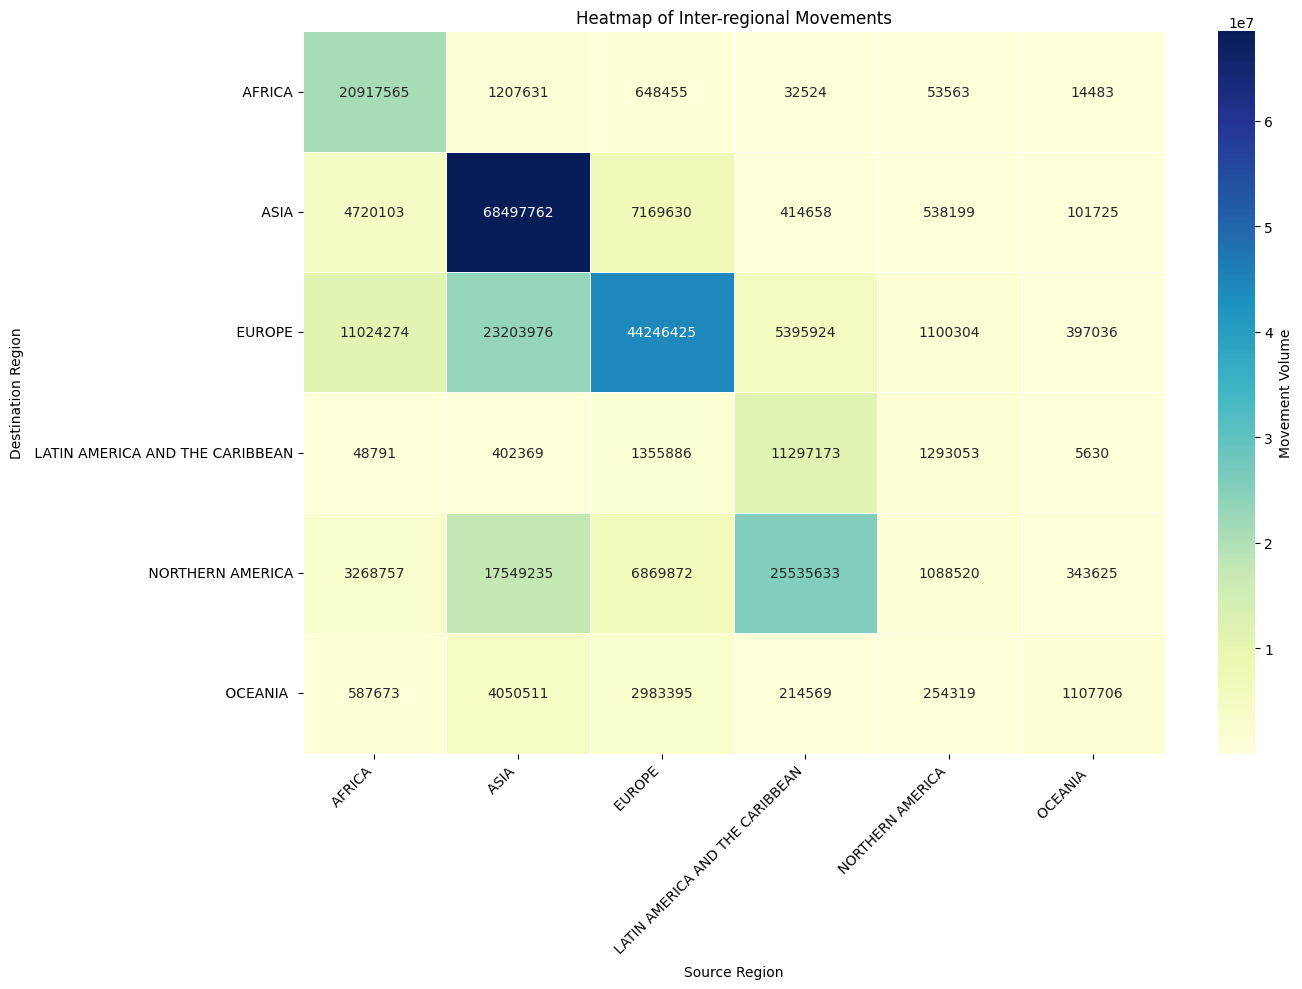

In [15]:
selected_countries = [" AFRICA", " ASIA", " EUROPE", " LATIN AMERICA AND THE CARIBBEAN", " NORTHERN AMERICA", " OCEANIA "]

create_heatmap(sdo_2020, selected_countries, 'Heatmap of Inter-regional Movements')


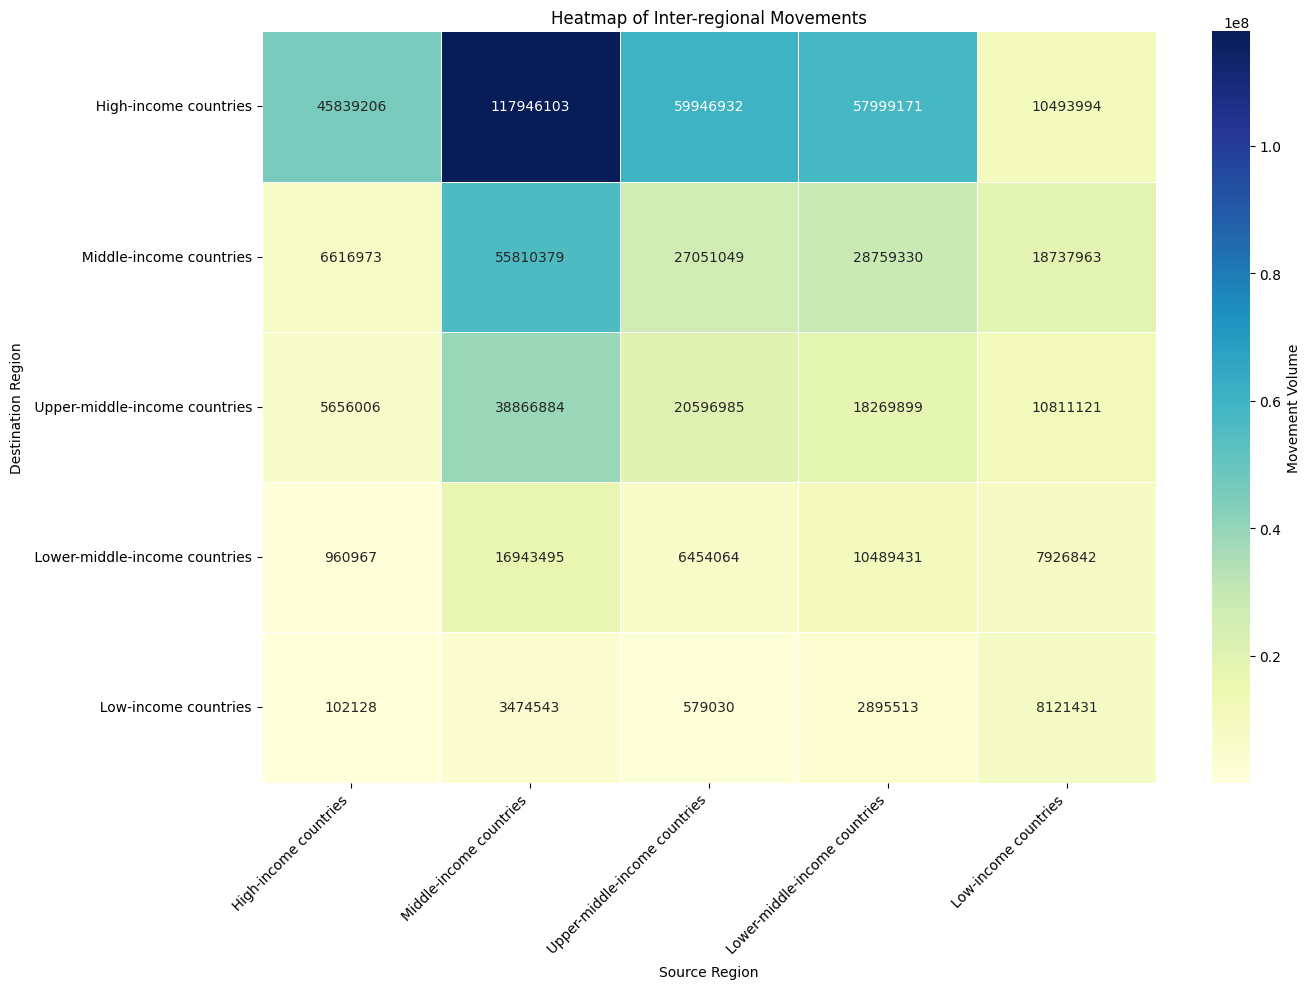

In [16]:
income_groups = ['  High-income countries', '  Middle-income countries', ' Upper-middle-income countries', ' Lower-middle-income countries', '  Low-income countries']
create_heatmap(sdo_2020, income_groups, 'Heatmap of Inter-regional Movements')

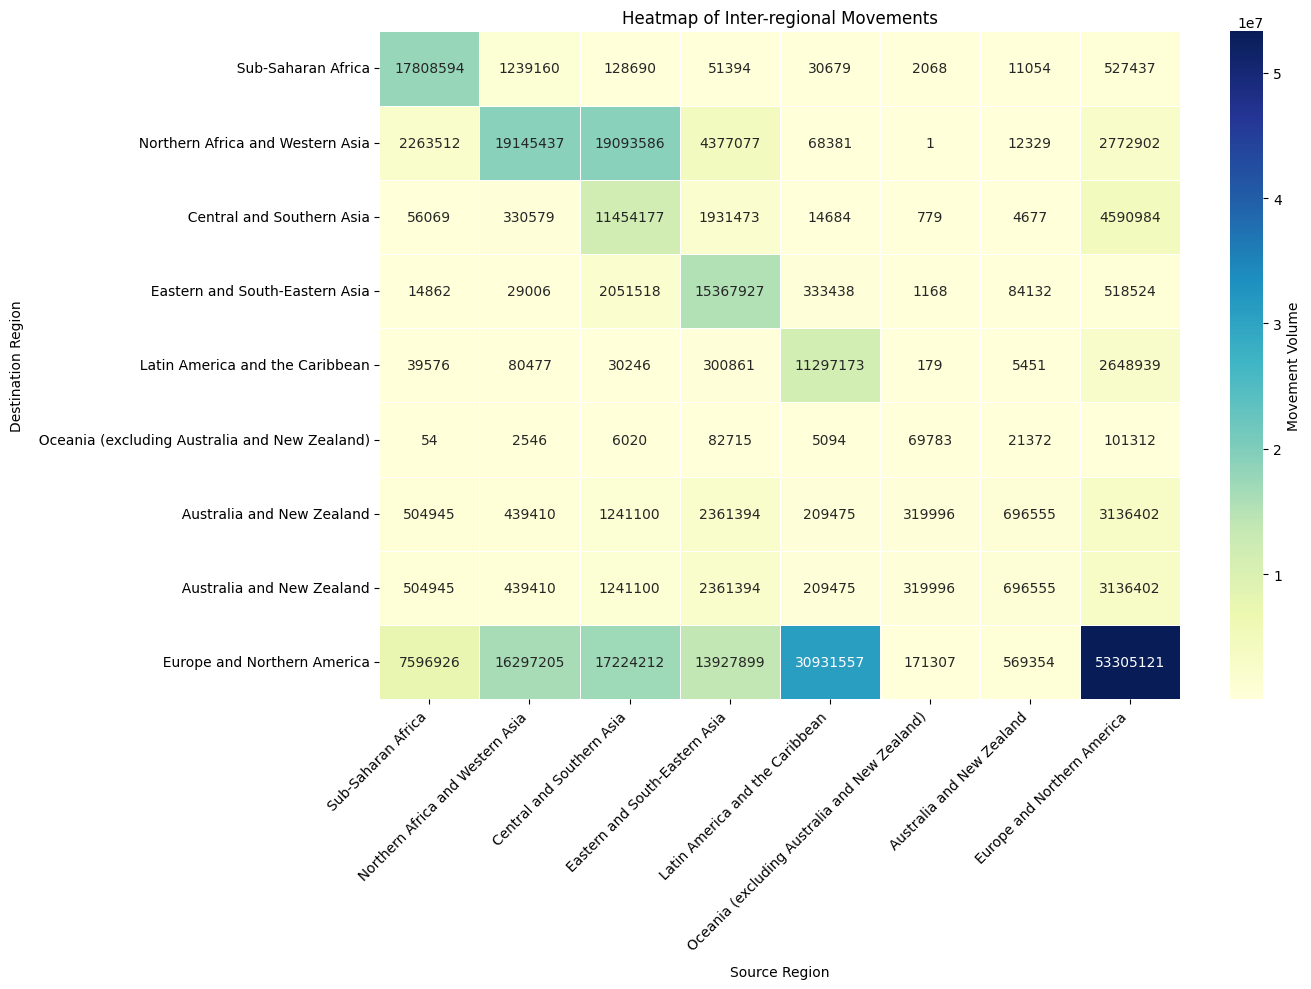

In [17]:
selected_regions = ['  Sub-Saharan Africa','  Northern Africa and Western Asia','  Central and Southern Asia','  Eastern and South-Eastern Asia',
                    '  Latin America and the Caribbean','  Oceania (excluding Australia and New Zealand)','  Australia and New Zealand',
                    '  Europe and Northern America']
create_heatmap(sdo_2020, selected_regions, 'Heatmap of Inter-regional Movements')

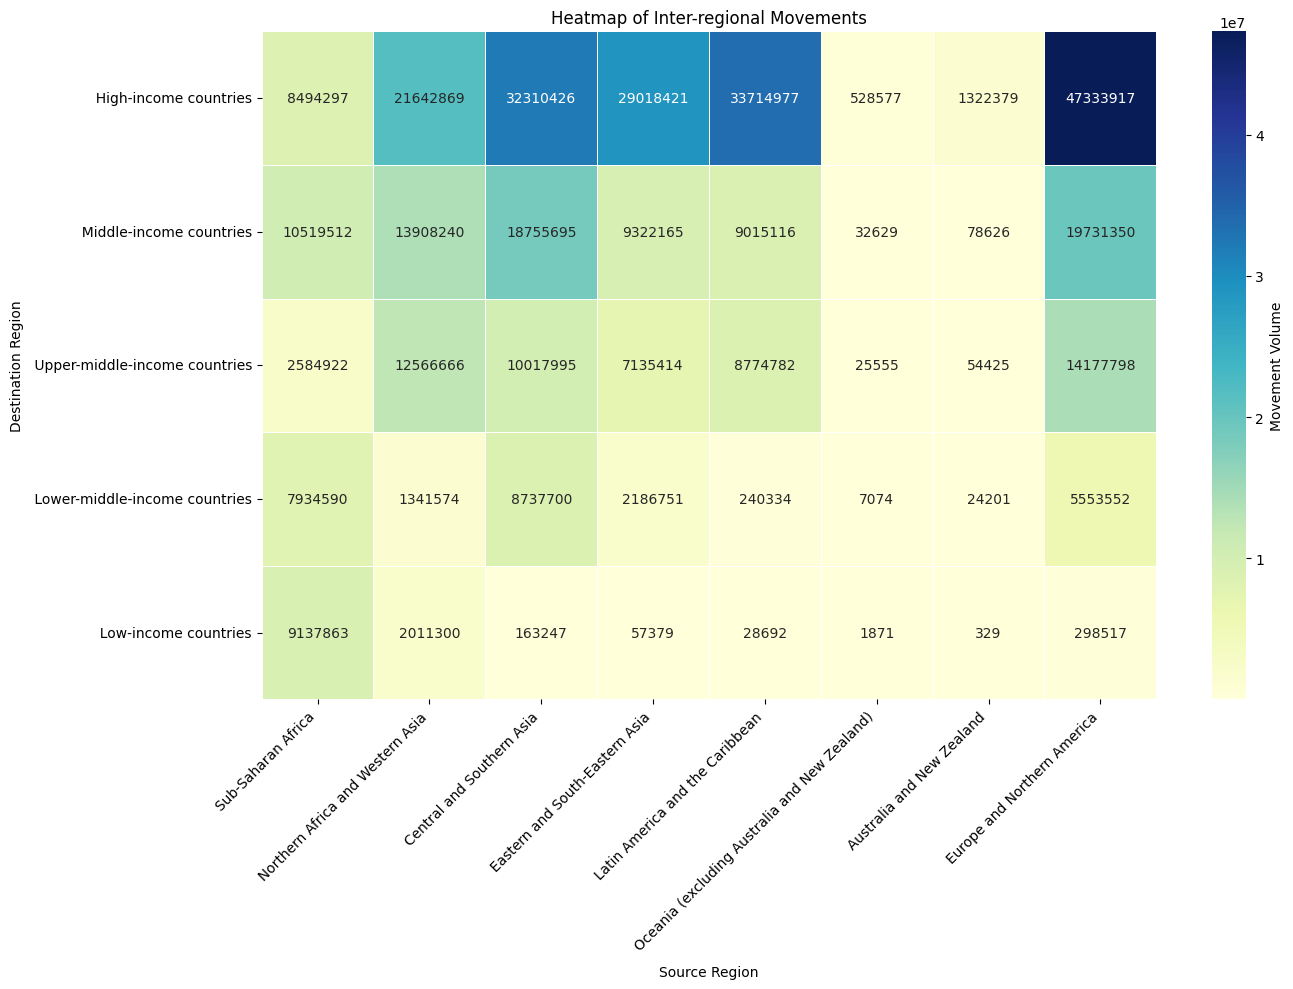

In [18]:
create_heatmap(sdo_2020, selected_regions, 'Heatmap of Inter-regional Movements', income_groups)

In [21]:
def preprocess_table_sex_and_region(df):
    """
    Preprocess the table
    """
    df = df.rename(columns={"Unnamed: 2": "Notes of destination", "Unnamed: 3": "Location code of destination"})
    df.iloc[0, 1] = np.nan
    df.iloc[0, 2] = np.nan
    df.set_index("Region, development group of destination", inplace=True)
    return df

In [31]:
sdo_ims_sex_region_copy = sdo_ims_sex_region.copy()
#new_header = sdo_ims_sex_region_copy.iloc[0]
#sdo_ims_sex_region_copy = sdo_ims_sex_region_copy[1:]
#sdo_ims_sex_region_copy.columns = new_header
# remove index column


# reset index
#sdo_ims_sex_region.reset_index(inplace=False)
#sdo_ims_sex_region_copy.set_index('Region, development group, country or area of destination', inplace=True)
sdo_ims_sex_region_copy

Index,Notes of destination,Location code of destination,Type of data of destination,"Region, development group, country or area of origin",Location code of origin,1990,1995,2000,2005,2010,...,2010,2015,2020,1990,1995,2000,2005,2010,2015,2020
"Region, development group, country or area of destination",,,,,,,,,,,,,,,,,,,,,
WORLD,NaN,900,NaN,WORLD,900,152986157,161289976,173230585,191446828,220983187,...,113940881,128238058,145655844,75422690,79708475,85510752,93783747,107042306,119720586,134942261
WORLD,NaN,900,NaN,Sub-Saharan Africa,947,15334807,16488973,15638014,17274985,19942724,...,10531120,12578348,14732802,7197963,7811167,7391439,8047927,9411604,11618863,13551736
WORLD,NaN,900,NaN,Northern Africa and Western Asia,1833,16365218,18069437,19437054,21867791,25313711,...,14249463,18177303,20941050,7535205,8240176,8700647,9770550,11064248,14428744,16622770
WORLD,NaN,900,NaN,Central and Southern Asia,921,31104020,29069983,30897694,33347690,41082388,...,24444167,27971106,31211577,14049348,13027520,13718322,14451806,16638221,18510024,20017972
WORLD,NaN,900,NaN,Eastern and South-Eastern Asia,1832,14774419,17860923,21440854,25556983,30977206,...,15130964,17150433,18801912,7359668,8999164,10940422,13069932,15846242,18055157,19598828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands*,41,876,B R,French Polynesia*,258,18,23,28,32,19,...,10,8,5,8,11,13,16,9,7,5
Wallis and Futuna Islands*,41,876,B R,Mayotte*,175,35,44,52,58,41,...,23,26,18,16,20,24,28,18,12,9
Wallis and Futuna Islands*,41,876,B R,New Caledonia*,540,843,975,1152,1207,1093,...,548,508,509,410,480,574,598,545,513,512


In [28]:
sdo_ims_sex_region.loc['WORLD',"Notes of destination"]

Region, development group, country or area of destination
WORLD    NaN
WORLD    NaN
WORLD    NaN
WORLD    NaN
WORLD    NaN
        ... 
WORLD    NaN
WORLD    NaN
WORLD    NaN
WORLD    NaN
WORLD    NaN
Name: Notes of destination, Length: 283, dtype: object